# Plot temperature response over time

This notebook plots temperature respons to SLCFs AND the total scenario forcing in a fixed nr of years

## Imports:

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

%load_ext autoreload
%autoreload 2

In [2]:
from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic

<IPython.core.display.Javascript object>

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


In [3]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

# PATH_DATASET = OUTPUT_DATA_DIR + '/forcing_data_rcmip_models.nc'
# PATH_DT = OUTPUT_DATA_DIR / '/dT_data_rcmip_models.nc'
PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP_old_IRF.nc'

## Set values:

In [4]:
first_y = '1750'
last_y = '2100'
# Years to plot:
years = ['2040', '2100']

**Set reference year for temperature change:**

In [5]:
ref_year = '2021'

In [6]:
FIGURE_DIR = RESULTS_DIR / 'figures_old_IRF/'

In [7]:
TABS_DIR = RESULTS_DIR / 'tables_old_IRF'

In [8]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'

In [9]:

name_deltaT = 'Delta T'

### Define variables to look at:

In [10]:
# variables to plot:
variables_erf_comp = [
    'ch4',
    'aerosol-total',
    'o3',
    'HFCs',
    'bc_on_snow']
# total ERFs for anthropogenic and total:
variables_erf_tot = ['total_anthropogenic',
                     'total']
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:

In [11]:

scenarios_fl_370 = ['ssp370', 'ssp370-lowNTCF-aerchemmip', 'ssp370-lowNTCF-gidden'  # Due to mistake here
                    ]

### Scenarios:

In [12]:
scenarios_fl = ['ssp119',
                'ssp126',
                'ssp245',
                'ssp370',
                'ssp370-lowNTCF-aerchemmip',
                'ssp370-lowNTCF-gidden',
                'ssp585']
scenarios_fl_oneNTCF = ['ssp119',
                'ssp126',
                'ssp245',
                'ssp370',
                'ssp370-lowNTCF-aerchemmip',
                #'ssp370-lowNTCF-gidden',
                'ssp585']

In [13]:
median = 'median'
perc5 = '5th percentile'
perc95 = '95th percentile'

In [14]:
table_csv_name = TABS_DIR /'3-2_table_all_scen.csv'
print(table_csv_name)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables_old_IRF/3-2_table_all_scen.csv


In [15]:

variables_tot = ['Total']
variables_sum = ['Sum SLCFs']


def setup_table_prop(scenario_n='', yrs=None, _vlist=None, scens=None):
    if _vlist is None:
        _vlist = variables_erf_comp
    if yrs is None:
        yrs = ['2040', '2100']
    if scens is None:
        scens = scenarios_fl
    its = [yrs, _vlist]
    _i = pd.MultiIndex.from_product(its, names=['', ''])
    table = pd.DataFrame(columns=scens, index=_i)  # .transpose()
    table.index.name = scenario_n
    return table

## Open dataset:

### Integrate:
The code below opens the file generated in [2_compute_delta_T.ipynb](2_compute_delta_T.ipynb) by integrating

\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

where IRF is the impulse response function and ERF is the effective radiative forcing from RCMIP. 

In [16]:
ds_DT = xr.open_dataset(PATH_DT)

## Compute sum of all SLCF forcers

In [17]:
from ar6_ch6_rcmipfigs.utils.plot import get_var_nicename

In [18]:
from ar6_ch6_rcmipfigs.utils.plot import get_scenario_c_dic, get_scenario_ls_dic

In [19]:

s_y = first_y

cdic = get_scenario_c_dic()
lsdic = get_scenario_ls_dic()


def sum_name(_var):
    """
    Returns the name off the sum o
    """
    return f'{_var} sum '


# make xarray with variable as new dimension:
_lst_f = []
_lst_dt = []
# Make list of dataArrays to be concatinated:
for var in variables_erf_comp:
    _lst_f.append(ds_DT['ERF'].sel(variable=var))
    _lst_dt.append(ds_DT[name_deltaT].sel(variable=var))
# Name of new var:
erf_all = sum_name('ERF')
# Name of new var:
dt_all = sum_name(name_deltaT)
# ds_DT[erf_all] = xr.concat(_lst_f, pd.Index(variables_erf_comp, name='variable'))
# ds_DT[dt_all] = xr.concat(_lst_dt, pd.Index(variables_erf_comp, name='variable'))
dt_totn = dt_all

### compute sum: 

In [20]:
sum_name = 'Sum SLCFs'
ds_sub = ds_DT.sel(variable=variables_erf_comp)
ds_sum = ds_sub.sum(variable)
ds_sum = ds_sum.assign_coords(coords={variable: sum_name})
# add sum to variable coordinate

ds_sum = xr.concat([ds_sum, ds_DT.sel(variable=variables_erf_comp)], dim=variable)

In [21]:
ds_sum  # .assign_coords(coords={variable:sum_name})

<xarray.Dataset>
Dimensions:     (percentile: 3, scenario: 10, variable: 6, year: 351)
Coordinates:
  * scenario    (scenario) object 'ssp534-over' ... 'ssp370-lowNTCF-aerchemmip'
  * percentile  (percentile) object '5th percentile' 'median' '95th percentile'
  * year        (year) int64 1750 1751 1752 1753 1754 ... 2097 2098 2099 2100
  * variable    (variable) object 'Sum SLCFs' 'ch4' ... 'HFCs' 'bc_on_snow'
Data variables:
    time        (year) datetime64[ns] ...
    ERF         (scenario, year, variable) float64 0.0 0.0 ... 0.2122 0.02698
    delta_t     (variable, year) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    Delta T     (percentile, scenario, year, variable) float64 0.0 ... 0.02896

In [22]:
scntab_dic = {}


# tab_tot = setup_table2()
# tab_tot_sd = setup_table2()
def table_of_sts(_ds, _scn_fl, variables, tab_vars, _yrs, ref_yr, sts='median'):
    """
    Creates pandas dataframe of statistics (mean, median, standard deviation) for change
    in temperature Delta T since year (ref year) for each scenario in scenarios,

    :param _ds:
    :param _scn_fl:
    :param variables:
    :param tab_vars:
    :param _yrs:
    :param ref_yr:
    :param sts:
    :return:
    """
    tabel = setup_table_prop(yrs=_yrs, _vlist=tab_vars)
    for scn in _scn_fl:
        for _var, tabvar in zip(variables, tab_vars):
            # dtvar =  name_deltaT # if ERF name, changes it here.
            tabscn = scn  # Table scenario name the same.
            for year in _yrs:
                _da = _ds[name_deltaT].sel(scenario=scn, variable=_var)
                _da_refy = _da.sel(year=slice(ref_yr, ref_yr)).squeeze()  # ref year value
                _da_y = _da.sel(year=slice(year, year))  # year value
                _tab_da = _da_y - _da_refy
                tabel.loc[(year, tabvar), tabscn] = float(_tab_da.sel(percentile=sts).squeeze().values)  # [0]

    return tabel


def table_of_stats_varsums(_ds, dsvar, tabvar, yrs, ref_yr, sts='median'):
    """
    Sums up over dimension 'variable' and creates pandas dataframe of statistics (mean, median, standard deviation) for change
    in temperature Delta T since year (ref year) for each scenario in scenarios. 

    :param tabvar:
    :param dsvar:
    :param _ds:
    :param yrs:
    :param ref_yr:
    :param sts:
    :return:
    """
    tabel = setup_table_prop(yrs=yrs, _vlist=[tabvar])
    da = _ds[name_deltaT].sel(variable=dsvar)

    for scn in scenarios_fl:
        tabscn = scn  # Table scenario name the same.
        for year in yrs:
            _da = da.sel(scenario=scn)  # , variable = dsvar)
            _da_refy = _da.sel(year=slice(ref_yr, ref_yr)).squeeze()  # ref year value
            _da_y = _da.sel(year=slice(year, year)).squeeze()  # year value
            _tab_da = (_da_y - _da_refy).squeeze()

            # Do statistics over RCMIP models
            tabel.loc[(year, tabvar), tabscn] = float(_tab_da.sel(percentile=sts).squeeze().values)  # [0]

    return tabel

### Computes statistics:

In [23]:
ds_DT.percentile

<xarray.DataArray 'percentile' (percentile: 3)>
array(['5th percentile', 'median', '95th percentile'], dtype=object)
Coordinates:
  * percentile  (percentile) object '5th percentile' 'median' '95th percentile'

In [24]:
ds_DT.variable.values

array(['co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric',
       'contrails', 'aerosol-radiation_interactions',
       'aerosol-cloud_interactions', 'bc_on_snow', 'land_use', 'volcanic',
       'solar', 'total_anthropogenic', 'total_natural', 'total',
       'aerosol-total', 'aerosol-total-with_bc', 'HFCs'], dtype=object)

In [25]:
from ar6_ch6_rcmipfigs.utils.plot import nice_name_var as nice_name_var_dic

## Make csv table:


In [26]:
# Mean:
tabel_dT_slcfs = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp + ['total_anthropogenic'],variables_erf_comp + ['total_anthropogenic'], years,
                              ref_year)
_tab = tabel_dT_slcfs.transpose()
o3 = 'o3'
ch4 = 'ch4'
HFCs = 'HFCs'
_sum = 'CH$_4$+O$_3$+HFCs'
for year in ['2040','2100']:
    _tab[(year,_sum)] =  _tab[(year,o3)] + _tab[(year,ch4)] + _tab[(year,HFCs)]
_tab= _tab.transpose()
_tab = _tab.sort_index()#()

In [27]:
_tab.rename(nice_name_var_dic)


fn =TABS_DIR /'dT_2040_2100_tab.csv'
_tab.to_csv(fn)

FileNotFoundError: [Errno 2] No such file or directory: '/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables_old_IRF/dT_2040_2100_tab.csv'

In [28]:
# Statistics on Delta T anthropogenic
# Mean
tabel_dT_anthrop = table_of_sts(ds_DT, scenarios_fl, ['total_anthropogenic'], ['Total'], years, ref_year)

# Standard deviation
tabel_dT_anthrop_5th = table_of_sts(ds_DT, scenarios_fl, ['total_anthropogenic'], ['Total'], years, ref_year,
                                    sts='5th percentile')
tabel_dT_anthrop_95th = table_of_sts(ds_DT, scenarios_fl, ['total_anthropogenic'], ['Total'], years, ref_year,
                                     sts='95th percentile')

In [29]:
# Mean:
tabel_dT_slcfs = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp, variables_erf_comp, years,
                              ref_year)
# Standard deviation
tabel_dT_slcfs_5th = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp, variables_erf_comp,
                                  years, ref_year, sts='5th percentile')
tabel_dT_slcfs_95th = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp, variables_erf_comp,
                                   years, ref_year, sts='5th percentile')

# Compute sum of SLCFs
_ds = ds_sum.copy()
vall = 'Delta T'



In [30]:
tabel_dT_slcfs

ssp119      ssp126      ssp245      ssp370  \
                                                                      
2040 ch4             -0.0164059 -0.00853214   0.0388736    0.064004   
     aerosol-total     0.307376     0.25748   0.0872585 -0.00967124   
     o3              -0.0568928  -0.0384577   0.0225677   0.0652059   
     HFCs             0.0108837   0.0197257   0.0275604   0.0254467   
     bc_on_snow      -0.0242442  -0.0202685 -0.00193313    0.017046   
2100 ch4              -0.176115    -0.16605  -0.0063659    0.271785   
     aerosol-total     0.567242    0.575669    0.409992   0.0367205   
     o3               -0.156076   -0.152359  -0.0437196    0.239299   
     HFCs          -0.000460781  0.00235895   0.0638183    0.102139   
     bc_on_snow      -0.0472427  -0.0442687   -0.039955   0.0116185   

                   ssp370-lowNTCF-aerchemmip ssp370-lowNTCF-gidden      ssp585  
                                                                                
2040 ch4                            0.064004            -0.0152726   0.0510205  
     aerosol-total                  0.115718              0.115718    0.158498  
     o3                             0.029017            -0.0197647    0.039109  
     HFCs                          0.0254467             0.0255205   0.0369336  
     bc_on_snow                 -0.000667837          -0.000667837  0.00128484  
2100 ch4                            0.271785              -0.14287    0.158296  
     aerosol-total                  0.411759              0.411759    0.335527  
     o3                             0.155982             -0.107453   0.0726126  
     HFCs                           0.102139             0.0894802    0.231585  
     bc_on_snow                   -0.0318657            -0.0318657  -0.0313247

In [31]:
tabel_dT_slcfs

ssp119      ssp126      ssp245      ssp370  \
                                                                      
2040 ch4             -0.0164059 -0.00853214   0.0388736    0.064004   
     aerosol-total     0.307376     0.25748   0.0872585 -0.00967124   
     o3              -0.0568928  -0.0384577   0.0225677   0.0652059   
     HFCs             0.0108837   0.0197257   0.0275604   0.0254467   
     bc_on_snow      -0.0242442  -0.0202685 -0.00193313    0.017046   
2100 ch4              -0.176115    -0.16605  -0.0063659    0.271785   
     aerosol-total     0.567242    0.575669    0.409992   0.0367205   
     o3               -0.156076   -0.152359  -0.0437196    0.239299   
     HFCs          -0.000460781  0.00235895   0.0638183    0.102139   
     bc_on_snow      -0.0472427  -0.0442687   -0.039955   0.0116185   

                   ssp370-lowNTCF-aerchemmip ssp370-lowNTCF-gidden      ssp585  
                                                                                
2040 ch4                            0.064004            -0.0152726   0.0510205  
     aerosol-total                  0.115718              0.115718    0.158498  
     o3                             0.029017            -0.0197647    0.039109  
     HFCs                          0.0254467             0.0255205   0.0369336  
     bc_on_snow                 -0.000667837          -0.000667837  0.00128484  
2100 ch4                            0.271785              -0.14287    0.158296  
     aerosol-total                  0.411759              0.411759    0.335527  
     o3                             0.155982             -0.107453   0.0726126  
     HFCs                           0.102139             0.0894802    0.231585  
     bc_on_snow                   -0.0318657            -0.0318657  -0.0313247

In [32]:
tabel_dT_sum_slcf = table_of_stats_varsums(ds_sum,  'Sum SLCFs', 'Sum SLCFs', years, ref_year)
tabel_dT_sum_slcf_5 = table_of_stats_varsums(ds_sum,  'Sum SLCFs', 'Sum SLCFs', years, ref_year,
                                             sts='5th percentile')
tabel_dT_sum_slcf_95 = table_of_stats_varsums(ds_sum,  'Sum SLCFs', 'Sum SLCFs', years, ref_year,
                                              sts='95th percentile')
tabel_dT_sum_slcf

,,ssp119,ssp126,ssp245,ssp370,ssp370-lowNTCF-aerchemmip,ssp370-lowNTCF-gidden,ssp585
,,,,,,,,
2040,Sum SLCFs,0.220717,0.209947,0.174327,0.162031,0.233518,0.105533,0.286846
2100,Sum SLCFs,0.187348,0.215349,0.38377,0.661562,0.909799,0.21905,0.766696


In [33]:
rn_dic = {}
for v in variables_all:
    rn_dic[v] = get_var_nicename(v)

In [34]:
tabel_dT_slcfs = tabel_dT_slcfs.rename(rn_dic)

In [35]:
rn_dic

{'ch4': 'Methane (CH$_4$)',
 'aerosol-total': 'Aerosols',
 'o3': 'Ozone (O$_3$)',
 'HFCs': 'HFCs',
 'bc_on_snow': 'BC on snow',
 'total_anthropogenic': 'total_anthropogenic',
 'total': 'total'}

## colors

In [36]:
cdic = get_cmap_dic(variables_erf_comp)  # , palette='colorblind'):
ls = [cdic[key] for key in variables_erf_comp]
ls

/home/sarambl/miniconda3/envs/rcmip_ch6/lib/python3.7/site-packages/pandas/core/indexing.py:1761: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


[(0.6784313725490196, 0.3686274509803922, 0.0),
 (0.4, 0.4, 0.37254901960784315),
 (0.8980392156862745, 0.8549019607843137, 0.2784313725490196),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373)]

## Error bars only from model uncertainty
The following uncertainties assume the ECS has a standard deviation of

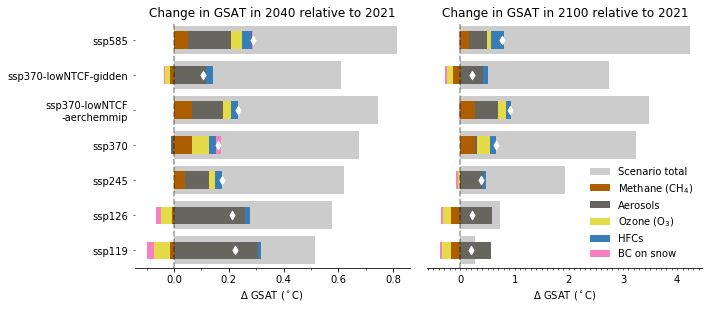

In [37]:
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.4], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2021)',
        'Long Term surface T change 2100 relatie to 2021)']
tits = ['Change in GSAT in 2040 relative to 2021', 'Change in GSAT in 2100 relative to 2021']
for yr, ax, tit in zip(years, axs, tits):
    ntot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[ntot].values, color='k', label='Scenario total', alpha=.2,
            )
    # Plot bars for SLCFs total:
    ntot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[ntot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})

    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)#, c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')

    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

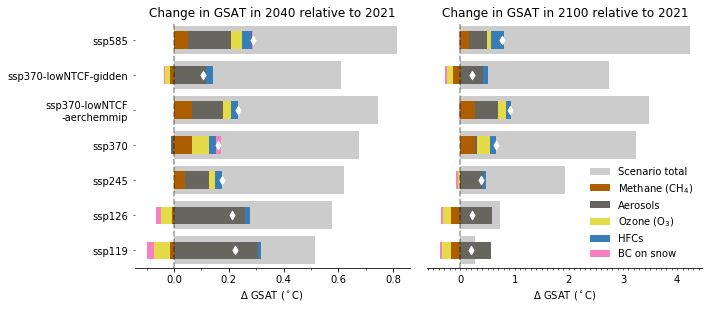

In [38]:
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.4], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2021)',
        'Long Term surface T change 2100 relatie to 2021)']
tits = ['Change in GSAT in 2040 relative to 2021', 'Change in GSAT in 2100 relative to 2021']
for yr, ax, tit in zip(years, axs, tits):
    ntot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[ntot].values, color='k', label='Scenario total', alpha=.2,
            )
    # Plot bars for SLCFs total:
    ntot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[ntot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})

    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)#, c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')

    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = RESULTS_DIR / 'figures/stack_bar_influence_years.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)

In [39]:
scen_no_lowNTCF = [scn for scn in scenarios_fl if 'lowNTCF' not in scn]
print(scen_no_lowNTCF)

['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']


In [40]:
tabel_dT_anthrop2= tabel_dT_anthrop[scenarios_fl_oneNTCF]
tabel_dT_slcfs2= tabel_dT_slcfs[scenarios_fl_oneNTCF]

In [41]:
tabel_dT_slcfs2

ssp119      ssp126      ssp245      ssp370  \
                                                                         
2040 Methane (CH$_4$)   -0.0164059 -0.00853214   0.0388736    0.064004   
     Aerosols             0.307376     0.25748   0.0872585 -0.00967124   
     Ozone (O$_3$)      -0.0568928  -0.0384577   0.0225677   0.0652059   
     HFCs                0.0108837   0.0197257   0.0275604   0.0254467   
     BC on snow         -0.0242442  -0.0202685 -0.00193313    0.017046   
2100 Methane (CH$_4$)    -0.176115    -0.16605  -0.0063659    0.271785   
     Aerosols             0.567242    0.575669    0.409992   0.0367205   
     Ozone (O$_3$)       -0.156076   -0.152359  -0.0437196    0.239299   
     HFCs             -0.000460781  0.00235895   0.0638183    0.102139   
     BC on snow         -0.0472427  -0.0442687   -0.039955   0.0116185   

                      ssp370-lowNTCF-aerchemmip      ssp585  
                                                             
2040 Methane (CH$_4$)                  0.064004   0.0510205  
     Aerosols                          0.115718    0.158498  
     Ozone (O$_3$)                     0.029017    0.039109  
     HFCs                             0.0254467   0.0369336  
     BC on snow                    -0.000667837  0.00128484  
2100 Methane (CH$_4$)                  0.271785    0.158296  
     Aerosols                          0.411759    0.335527  
     Ozone (O$_3$)                     0.155982   0.0726126  
     HFCs                              0.102139    0.231585  
     BC on snow                      -0.0318657  -0.0313247

- Include BC in aerosol total. 
- aaarggh, sorry, a last request, maybe one version with also SSP370lowNTC with and without CH4 decrease (as it was in SOD) and one without and we will see later which one we choose depending on the discussion which will remain in the TS.
- net values. Send. 
- include total in black. 

In [ ]:
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.2], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2021)',
        'Long Term surface T change 2100 relatie to 2021)']
tits = ['Change in GSAT in 2040 relative to 2021', 'Change in GSAT in 2100 relative to 2021']
for yr, ax, tit in zip(years, axs, tits):
    ntot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[ntot].values, color='k', label='Scenario total', alpha=.2,
            )
    # Plot bars for SLCFs total:
    ntot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[ntot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})

    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)#, c=100)#.plot(kind='barh', )
    #ax.scatter(_t, _t.index, zorder=100, c='w', marker='d')
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    
    #a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_one_lowNTCF.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)

In [ ]:
tabel_dT_anthrop2= tabel_dT_anthrop[scen_no_lowNTCF]
tabel_dT_slcfs2= tabel_dT_slcfs[scen_no_lowNTCF]

In [ ]:
tabel_dT_slcfs2

In [ ]:
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 3.8], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2021)',
        'Long Term surface T change 2100 relatie to 2021)']
tits = ['Change in GSAT in 2040 relative to 2021', 'Change in GSAT in 2100 relative to 2021']
for yr, ax, tit in zip(years, axs, tits):
    ntot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[ntot].values, color='k', label='Scenario total', alpha=.2,
            )
    # Plot bars for SLCFs total:
    ntot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[ntot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})

    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)#, c=100)#.plot(kind='barh', )
    #ax.scatter(_t, _t.index, zorder=100, c='w', marker='d')
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    
    #a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_no_lowNTCF.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)

In [ ]:
variables_erf_comp

In [ ]:
variables_erf_comp_nbc = ['ch4', 'aerosol-total-with_bc', 'o3', 'HFCs']

In [ ]:
tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                              ref_year)
tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
tabel_dT_slcfs2 = tabel_dT_slcfs2[scen_no_lowNTCF]

In [ ]:
tabel_dT_slcfs2

In [ ]:
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 3.4], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2021)',
        'Long Term surface T change 2100 relatie to 2021)']
tits = ['Change in GSAT in 2040 relative to 2021', 'Change in GSAT in 2100 relative to 2021']
for yr, ax, tit in zip(years, axs, tits):
    ntot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[ntot].values, color='k', label='Scenario total', alpha=.2,
            )
    # Plot bars for SLCFs total:
    ntot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[ntot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)#, c=100)#.plot(kind='barh', )
    #ax.scatter(_t, _t.index, zorder=100, c='w', marker='d')
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    
    #a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_no_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)

In [ ]:

tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl_oneNTCF, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                              ref_year)
tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
tabel_dT_slcfs2 = tabel_dT_slcfs2[scenarios_fl_oneNTCF]
tabel_dT_anthrop2= tabel_dT_anthrop[scenarios_fl_oneNTCF]

In [ ]:
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.1], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2021)',
        'Long Term surface T change 2100 relatie to 2021)']
tits = ['Change in GSAT in 2040 relative to 2021', 'Change in GSAT in 2100 relative to 2021']
for yr, ax, tit in zip(years, axs, tits):
    ntot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[ntot].values, color='k', label='Scenario total', alpha=.2,
            )
    # Plot bars for SLCFs total:
    ntot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[ntot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)#, c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    print(_t)
    #a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_one_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)

In [ ]:

tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                              ref_year)
tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
tabel_dT_slcfs2 = tabel_dT_slcfs2[scenarios_fl]
tabel_dT_anthrop2= tabel_dT_anthrop[scenarios_fl]

In [ ]:
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.5], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2021)',
        'Long Term surface T change 2100 relatie to 2021)']
tits = ['Change in GSAT in 2040 relative to 2021', 'Change in GSAT in 2100 relative to 2021']
for yr, ax, tit in zip(years, axs, tits):
    ntot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[ntot].values, color='k', label='Scenario total', alpha=.2,
            )
    # Plot bars for SLCFs total:
    ntot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[ntot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)#, c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    print(_t)
    #a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_all_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)

## Error bars from model uncertainty AND ECS uncertainty

See [Uncertainty_calculation.ipynb](Uncertainty_calculation.ipynb)

## Only ssp370:

In [ ]:
scenario_370 = [sc for sc in scenarios_fl if 'ssp370' in sc]

In [ ]:
from ar6_ch6_rcmipfigs.constants import RESULTS_DIR
from matplotlib.ticker import (MultipleLocator)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(years), figsize=[10, 2.5], sharex=False, sharey=True)

tits = ['Near Term surface temperature change (2040 relative to 2021)',
        'Long Term surface T change 2100 relatie to 2021)']
tits = ['Change in GSAT in 2040 relative to 2021', 'Change in GSAT in 2100 relative to 2021']
for yr, ax, tit in zip(years, axs, tits):
    ntot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop.loc[yr, scenario_370].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr, scenario_370].rename(
        {'Total': ntot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[ntot].values, color='k', label='Scenario total', alpha=.2,
            )
    # Plot bars for SLCFs total:
    ntot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[ntot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs.loc[yr, scenario_370].transpose().rename(
        {'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})

    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls,
                  legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=True, )  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()
fn = FIGURE_DIR / 'stack_bar_influence_years_horiz_errTot_370only.png'

plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)